<a href="https://colab.research.google.com/github/GildasTaliah/Solutions_with_PyNoteBook/blob/main/MLTreeBasedModels_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE LEARNING WITH TREE BASED MODELS WITH PYTHON**

**Description**

Decision trees are supervised learning models used for problems involving classification and regression. Tree models present a high flexibility that comes at a price: on one hand, trees are able to capture complex non-linear relationships; on the other hand, they are prone to memorizing the noise present in a dataset. By aggregating the predictions of trees that are trained differently, ensemble methods take advantage of the flexibility of trees while reducing their tendency to memorize noise. Ensemble methods are used across a variety of fields and have a proven track record of winning many machine learning competitions.

In this course, you'll learn how to use Python to train decision trees and tree-based models with the user-friendly scikit-learn machine learning library. You'll understand the advantages and shortcomings of trees and demonstrate how ensembling can alleviate these shortcomings, all while practicing on real-world datasets. Finally, you'll also understand how to tune the most influential hyperparameters in order to get the most out of your models.



# **1. Classification and Regression Trees**

Classification and Regression Trees (CART) are a set of supervised learning models used for problems involving classification and regression. In this chapter, you'll be introduced to the CART algorithm.

In [70]:
# Import data from DataCamp
import pandas as pd

# Automobile miles per gallon  data
url = "https://assets.datacamp.com/production/repositories/1796/datasets/3781d588cf7b04b1e376c7e9dda489b3e6c7465b/auto.csv"
auto_df = pd.read_csv(url)

# Breast cancer data
url =  "https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv"
wbc_df = pd.read_csv(url)

# Bike data
url = "https://assets.datacamp.com/production/repositories/1796/datasets/594538f54a854b322d6e4c8031f3f31bc522d3e5/bikes.csv"
bikes_df = pd.read_csv(url)

In [7]:
# Save as CSV
#auto_df.to_csv('auto.csv', index=False)
#wbc_df.to_csv('wbc.csv', index=False)
#bikes_df.to_csv('bikes.csv', index=False)

Train your first classification tree
In this exercise you'll work with the [Wisconsin Breast Cancer](https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv) Dataset from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (radius_mean) and its mean number of concave points (concave points_mean).

The dataset is already loaded in your workspace and is split into 80% train and 20% test. The feature matrices are assigned to X_train and X_test, while the arrays of labels are assigned to y_train and y_test where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor. To obtain reproducible results, we also defined a variable called SEED which is set to 1.

In [9]:
# Vie wbc data
wbc_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [39]:
wbc_df['diagnosis'] = wbc_df['diagnosis'].map({'M': 1, 'B': 0})
wbc_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [40]:
# Import packages necessary to split data
from sklearn.model_selection import train_test_split

# Split data into 80% train and 20% test, with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(wbc_df[['radius_mean', 'concave points_mean']], \
                                   wbc_df['diagnosis'], test_size=0.2, stratify=wbc_df.diagnosis)
X_train.head(), X_test.head(), y_train.head(), y_test.head()

(     radius_mean  concave points_mean
 549        10.82              0.00816
 565        20.13              0.09791
 37         13.03              0.02923
 193        12.34              0.04562
 541        14.47              0.03890,
      radius_mean  concave points_mean
 83        19.100             0.146900
 262       17.290             0.075070
 114        8.726             0.019240
 306       13.200             0.003261
 100       13.610             0.044890,
 549    0
 565    1
 37     0
 193    1
 541    0
 Name: diagnosis, dtype: int64,
 83     1
 262    1
 114    0
 306    0
 100    1
 Name: diagnosis, dtype: int64)

In [50]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
SEED = 75
dt = DecisionTreeClassifier(max_depth = 6, random_state=SEED)

# Fit dt to the training set

dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

# map to M and B
y_pred_map = ['M' if val == 1 else 'B' for val in y_pred]
print(y_pred_map[0:5])

"Awesome! You've just trained your first classification tree! You can see the first five predictions made by the fitted tree on the test set in the console. In the next exercise, you'll evaluate the tree's performance on the entire test set."

[1 1 0 0 0]
['M', 'M', 'B', 'B', 'B']


"Awesome! You've just trained your first classification tree! You can see the first five predictions made by the fitted tree on the test set in the console. In the next exercise, you'll evaluate the tree's performance on the entire test set."

**Evaluate the classification tree**

Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

The trained model dt from the previous exercise is loaded in your workspace along with the test set features matrix X_test and the array of labels y_test.

In [51]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

"Not bad! Using only two features, your tree was able to achieve an accuracy of 88%!"

Test set accuracy: 0.89


'Not bad! Using only two features, your tree was able to achieve an accuracy of 88%!'

**Logistic regression vs classification tree**

A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

We have written a custom function called plot_labeled_decision_regions() that you can use to plot the decision regions of a list containing two trained classifiers. You can type help(plot_labeled_decision_regions) in the shell to learn more about this function.

X_train, X_test, y_train, y_test, the model dt that you've trained in an earlier exercise, as well as the function plot_labeled_decision_regions() are available in your workspace.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_labeled_decision_regions(X, y, models):
    """
    Function producing a scatter plot of the instances contained
    in the 2D dataset (X, y) along with the decision
    regions of two trained classification models contained in the
    list 'models'.

    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features
    y: pandas Series corresponding to the class labels
    models: list containing two trained classifiers
    """
    if X.shape[1] != 2:
        raise ValueError("X must have exactly two features for 2D visualization.")

    if len(models) != 2:
        raise ValueError("Exactly two models must be provided.")

    # Prepare the figure with subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    feature1, feature2 = X.columns

    # Define the grid for plotting
    x_min, x_max = X[feature1].min() - 1, X[feature1].max() + 1
    y_min, y_max = X[feature2].min() - 1, X[feature2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Generate colors for the plots
    cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    scatter_colors = ['red', 'green', 'blue']

    for i, model in enumerate(models):
        # Convert the meshgrid into a DataFrame with the same column names as X
        grid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns)

        # Predict over the grid
        try:
            Z = model.predict(grid_points)  # Use DataFrame as input
        except Exception as e:
            raise ValueError(f"Model {i+1} failed during prediction: {e}")

        # Debugging: Ensure Z is numeric
        if not np.issubdtype(Z.dtype, np.number):
            raise TypeError(f"Model {i+1} predictions are not numeric. Predictions: {Z}")

        # Reshape Z to match the shape of the grid
        try:
            Z = np.array(Z).reshape(xx.shape)
        except Exception as e:
            raise ValueError(f"Failed to reshape predictions for Model {i+1}: {e}")

        # Plot decision regions
        try:
            axes[i].contourf(xx, yy, Z, alpha=0.8, cmap=cmap)
        except Exception as e:
            raise ValueError(f"Failed to plot decision regions for Model {i+1}: {e}")

        # Scatter plot of the data
        for idx, class_label in enumerate(np.unique(y)):
            axes[i].scatter(X.loc[y == class_label, feature1],
                            X.loc[y == class_label, feature2],
                            c=scatter_colors[idx], label=f'Class {class_label}', edgecolor='k')

        # Set titles and labels
        axes[i].set_title(f'Decision regions for model {i + 1}')
        axes[i].set_xlabel(feature1)
        axes[i].set_ylabel(feature2)
        axes[i].legend()

    plt.tight_layout()
    plt.show()


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_labeled_decision_regions(X, y, models):
    if X.shape[1] != 2:
        raise ValueError("X must have exactly two features for 2D visualization.")

    if len(models) != 2:
        raise ValueError("Exactly two models must be provided.")

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    feature1, feature2 = X.columns

    x_min, x_max = X[feature1].min() - 1, X[feature1].max() + 1
    y_min, y_max = X[feature2].min() - 1, X[feature2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    scatter_colors = ['red', 'green', 'blue']

    for i, model in enumerate(models):
        grid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns)
        try:
            Z = model.predict(grid_points)
            if isinstance(Z, list) or isinstance(Z, pd.Series):
                Z = np.array(Z)
            if not np.issubdtype(Z.dtype, np.number):
                raise ValueError(f"Non-numeric predictions detected: {Z[:10]}")

            if Z.ndim > 1:  # Convert probabilities to class labels
                Z = np.argmax(Z, axis=1)
        except Exception as e:
            raise ValueError(f"Model {i+1} failed during prediction: {e}")

        try:
            Z = Z.reshape(xx.shape)
        except Exception as e:
            raise ValueError(f"Failed to reshape predictions for Model {i+1}: {e}")

        try:
            axes[i].contourf(xx, yy, Z, alpha=0.8, cmap=cmap)
        except Exception as e:
            raise ValueError(f"Failed to plot decision regions for Model {i+1}: {e}")

        for idx, class_label in enumerate(np.unique(y)):
            axes[i].scatter(X.loc[y == class_label, feature1],
                            X.loc[y == class_label, feature2],
                            c=scatter_colors[idx], label=f'Class {class_label}', edgecolor='k')

        axes[i].set_title(f'Decision regions for model {i + 1}')
        axes[i].set_xlabel(feature1)
        axes[i].set_ylabel(feature2)
        axes[i].legend()

    plt.tight_layout()
    plt.show()


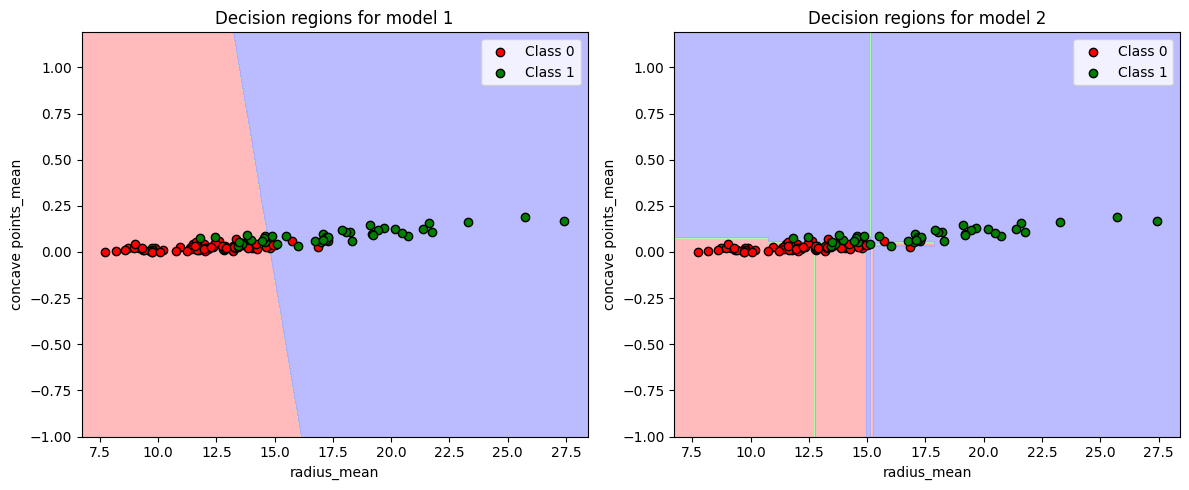

'Great work! Notice how the decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions.'

In [44]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

clfs
# Review the decision regions of the two classifiers
# convert y to numeric

plot_labeled_decision_regions(X_test, y_test, clfs)

"Great work! Notice how the decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions."

**Classification Trees Learning**

A **Decision Tree** is a data structure consisting of Hierarchy of Notes.
The tree like structure is like this: Root, then internal nodes and lastly the leafs. The root starts with a single feature, splitted into two bracnches and then comes the **first internal node**. The first internal is then splitted across that **depth level** using a single feature to result to the **next internal node** and so on until the **leafs** are gotten, which presents the prediction.

- Thus the **maximum depth** equals: Root (1) + number of Internal Nodes (NoIN) = 1 + NoIN.

The nodes of a classification tree are grown recursively; in other words, the obtention of an internal node or a leaf depends on the state of its predecessors.

To produce the purest leafs possible, at each node, a tree asks a question involving one feature **f** and a split-point **sp**.

- But how does it know which feature and which split-point to pick?

It does so by maximizing **Information gain! IG** The tree considers that every node contains information and aims at maximizing the Information Gain obtained after each split. Consider the case where a node with N samples is split into a left-node with Nleft samples and a right-node with N right samples.

The information gain for such split is given by the formula shown here.

$$IG(f, sp) = I(parent) -  \frac{N_{left}}{N} * I(left) - \frac{N_{right}}{N} * I(right)$$

Where:

-  $I(node)$ represents the **impurity of the node**.
- N, N-left, N-right total number of samples, left samples, right samples.  


A question that you may have in mind here is:
- What criterion is used to measure the impurity of a node?


Well, there are different criteria you can use among which are the **gini-index, entropy, log loss** for classification, see more [see more](https://scikit-learn.org/1.5/modules/tree.html#tree-mathematical-formulation), **squared error, friedman_mse, poisson** for regression.

Now that you know what is Information gain, let's describe how a classification tree learns.

At each Node, split data based on **f** and **sp** to **maximize the** $IG(node)$.

If $IG(node) = 0$, declare the node a **leaf**

**Growing a classification tree**

In the video, you saw that the growth of an unconstrained classification tree followed a few simple rules. Which of the following is not one of these rules?

- The existence of a node depends on the state of its predecessors.
- The impurity of a node can be determined using different criteria such as entropy and the gini-index.

- When the information gain resulting from splitting a node is null, the node is declared as a leaf.
- When an internal node is split, the split is performed in such a way so that information gain is minimized.

Absolutely so! (4) It's quite the contrary! Actually, splitting an internal node always involves maximizing information gain!




**Using entropy as a criterion**

In this exercise, you'll train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. You'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.

X_train as well as the array of labels y_train are available in your workspace.

In [55]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

"Wonderful! In the next exercise, you'll compare the accuracy of dt_entropy \
to the accuracy of a another tree trained using the gini-index as the information criterion."

"Wonderful! In the next exercise, you'll compare the accuracy of dt_entropy to the accuracy of a another tree trained using the gini-index as the information criterion."

**Entropy vs Gini index**

In this exercise you'll compare the test set accuracy of dt_entropy to the accuracy of another tree named dt_gini. The tree dt_gini was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword 'gini'.

X_test, y_test, dt_entropy, as well as accuracy_gini which corresponds to the test set accuracy achieved by dt_gini are available in your workspace.

In [54]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print(f'Accuracy achieved by using entropy: {accuracy_entropy:.3f}', '\n')


# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Evaluate accuracy
y_pred = dt_gini.predict(X_test)

# Evaluate accuracy_gini
accuracy_gini = accuracy_score(y_test, y_pred)

# Print accuracy_gini
print(f'Accuracy achieved by using the gini index: {accuracy_gini:.3f}', '\n')

"Nice work! Notice how the two models achieve accuracy greater that 85%. \
Most of the time, the gini index and entropy lead to the same results. \
The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn."

Accuracy achieved by using entropy: 0.904 

Accuracy achieved by using the gini index: 0.886 



'Nice work! Notice how the two models achieve accuracy greater that 85%. Most of the time, the gini index and entropy lead to the same results. The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn.'

**Train your first regression tree**

In this exercise, you'll train a regression tree to predict the mpg (miles per gallon)  consumption of cars in the auto-mpg dataset using all the six available features.

The dataset is processed for you and is split to 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

In [71]:
auto_df.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [72]:
auto_df = pd.get_dummies(auto_df, columns=['origin'], dtype=int)

In [73]:
auto_df.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


min_sample_leaf of 0.13 implies, each leaf has to contain at least 13% of the training data.

Infrormation criteria for regression:

$$I(node) = MSE(node) = \frac{1}{n_{Node}} * \sum_{i \in node}^{} (y^{(i)} - \hat{y}_{node}) ^2.$$
where (mean-target-value):
$$\hat{y}_{node} = \frac{1}{n_{Node}} * \sum_{i \in node}^{} y^{(i)}. $$

In [74]:
# split the auto data
from sklearn.model_selection import train_test_split

# Split data into 80% train and 20% test, with stratified sampling

columns = ['displ', 'hp', 'weight', 'accel', 'size', 'origin_Asia', 'origin_Europe', 'origin_US']
X_train, X_test, y_train, y_test = train_test_split(auto_df[columns], auto_df.mpg,
                                                    test_size=0.2)

In [80]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
                           min_samples_leaf=0.13,
                           random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

"Great work! In the next exercise, you'll evaluate dt's performance on the test set."

"Great work! In the next exercise, you'll evaluate dt's performance on the test set."

**Evaluate the regression tree**

In this exercise, you will evaluate the test set performance of dt using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

The features matrix X_test, the array y_test, as well as the decision tree regressor dt that you trained in the previous exercise are available in your workspace.

In [81]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

"Great work! In the next exercise, you'll compare the test-set RMSE of dt to that of \
a linear regression model trained on the same dataset."

Test set RMSE of dt: 4.25


"Great work! In the next exercise, you'll compare the test-set RMSE of dt to that of a linear regression model trained on the same dataset."

**Linear regression vs regression tree**

In this exercise, you'll compare the test set RMSE of dt to that achieved by a linear regression model. We have already instantiated a linear regression model lr and trained it on the same dataset as dt.

The features matrix X_test, the array of labels y_test, the trained linear regression model lr, mean_squared_error function which was imported under the alias MSE and rmse_dt from the previous exercise are available in your workspace.

In [82]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

# Predict test set labels
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr), '\n')

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt), '\n')

"Awesome! You're on your way to master decision trees."

Linear Regression test set RMSE: 3.55 

Regression Tree test set RMSE: 4.25 



"Awesome! You're on your way to master decision trees."

# **2. The Bias Variance Trade-Off**

The bias-variance tradeoff is one of the fundamental concepts in supervised machine learning. In this chapter, you'll understand how to diagnose the problems of overfitting and underfitting. You'll also be introduced to the concept of ensembling where the predictions of several models are aggregated to produce predictions that are more robust, this robustness reduces the chances of overfitting.